In [1]:
import json
import os
import math
from tqdm import tqdm

def load_game(filename: str) -> dict:
    """Load game data from a JSON file."""
    with open(filename, 'r') as file:
        data = json.load(file)
    return data


games = []
game_path = os.path.join(".", "crawler", "games", "classic")

for file in tqdm(os.listdir(game_path)):
    if file.endswith(".json"):
        game_data = load_game(os.path.join(game_path, file))
        games.append(game_data)

print(f"Loaded {len(games)} games.")

players = []
players_name_lvl = {}
for game in tqdm(games):
    for participant in game.get("info").get("participants", []):
        players_name_lvl[participant.get("riotIdGameName") + " #" + participant.get("riotIdTagline")] = participant.get("summonerLevel", 0)

for name, level in players_name_lvl.items():
    players.append((name, level))

print(f"Unique players: {len(players)}")



100%|██████████| 35255/35255 [02:41<00:00, 218.29it/s]


Loaded 35255 games.


100%|██████████| 35255/35255 [00:05<00:00, 6353.13it/s] 


Unique players: 254362


In [2]:
from analysis.core import *

In [3]:
len(get_all_participants(games))

100%|██████████| 35255/35255 [00:01<00:00, 26188.76it/s]


253618 total number of players.


253618

In [4]:
print(get_all_gametypes(games))

100%|██████████| 35255/35255 [00:00<00:00, 423437.17it/s]

['MATCHED_GAME', 'CUSTOM_GAME']


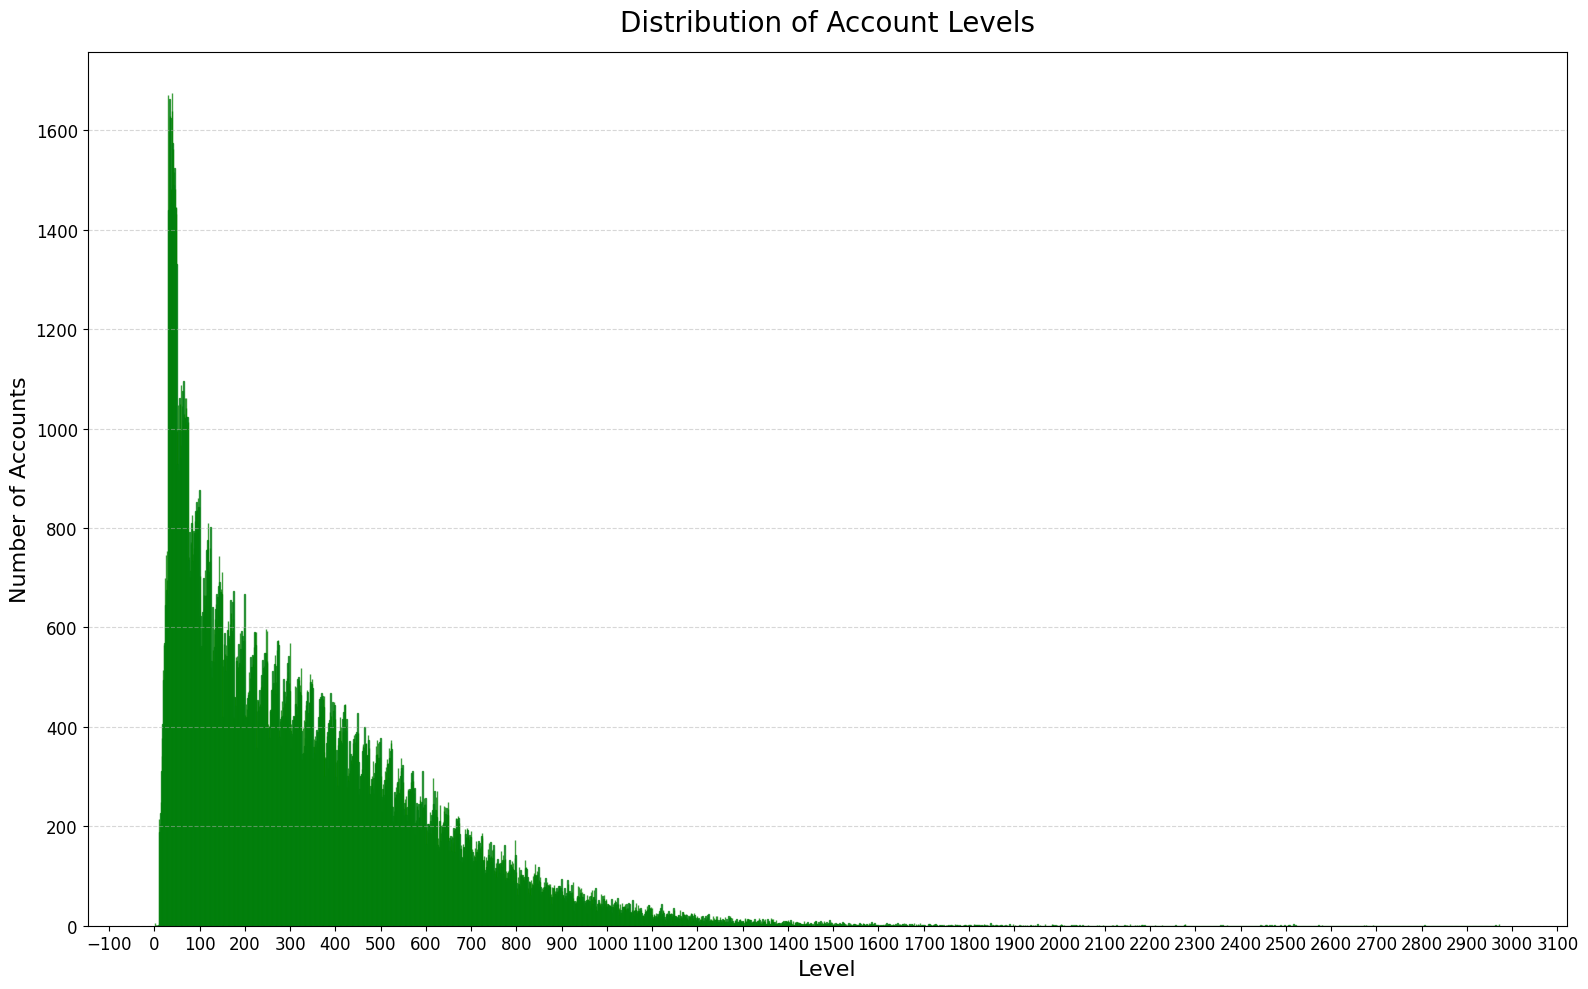

"Qnoxs #17165" Level: 2971


In [5]:
plot_level_distribution(games)
hname, hlevel = get_highest_level_player(games)
print(f"\"{hname}\" Level: {hlevel}")

  8%|▊         | 5/61 [00:06<00:50,  1.11it/s]

100%|██████████| 61/61 [00:37<00:00,  1.62it/s]


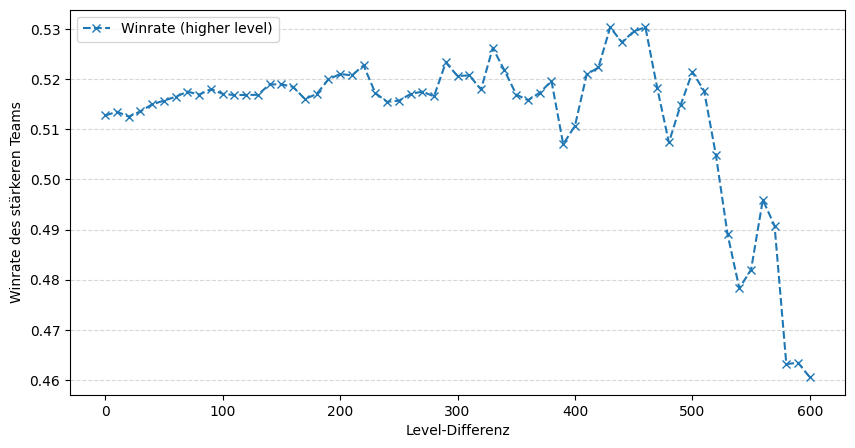

In [6]:
import matplotlib.pyplot as plt

diffs = [i * 10 for i in range(0, 61)]
winrates = [higher_level_winrate(games, d) for d in tqdm(diffs)]

plt.figure(figsize=(10, 5))
plt.plot(diffs, winrates, marker="x", linestyle="--", label="Winrate (higher level)")

#plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
#plt.yticks([i/10 for i in range(0, 11)])

plt.xlabel("Level-Differenz")
plt.ylabel("Winrate des stärkeren Teams")
plt.legend()
plt.show()


100%|██████████| 101/101 [01:02<00:00,  1.62it/s]


[0.5073274637886964, 0.507454412837345, 0.5081849253462853, 0.5083754156915876, 0.508708594591171, 0.5089390578102571, 0.5091483923045876, 0.5094071584491182, 0.5087103018137501, 0.5087673772011121, 0.509414466130884, 0.5097619896241733, 0.5091444703571867, 0.509930129155198, 0.5105842135250033, 0.5110012248786463, 0.5112994350282486, 0.511440305074802, 0.5118987341772152, 0.513433934486566, 0.5140875832696298, 0.5144964539007092, 0.5147876493552584, 0.5153902979561684, 0.5153629496863398, 0.5155896069287141, 0.5168023377165518, 0.5162669371784653, 0.5142986493624085, 0.5154509803921569, 0.5152406635613304, 0.5153463648834019, 0.5154990145135281, 0.5158789463852046, 0.5168539325842697, 0.5199713964654203, 0.5195095948827292, 0.5200267767488564, 0.5213137665967854, 0.5221788934925664, 0.5213468869123253, 0.5216582513951634, 0.5213651498335183, 0.5207152202354993, 0.5222813688212927, 0.5204425204425205, 0.5220094086021505, 0.5213253436728938, 0.5201485608170845, 0.5206950409996095, 0.518

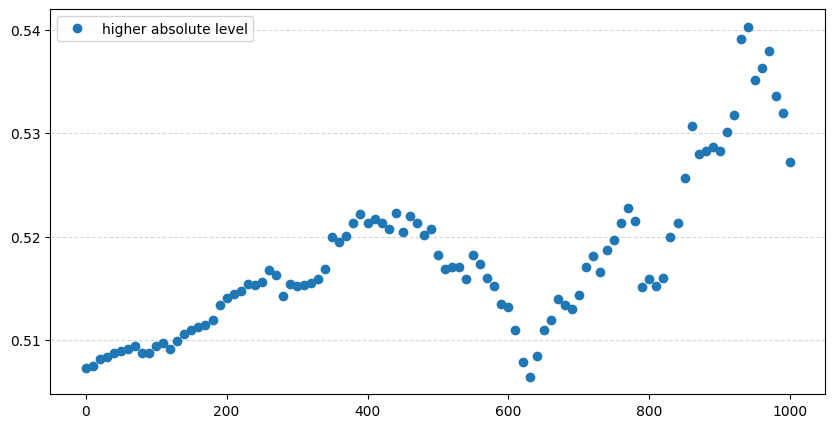

In [7]:
import matplotlib.pyplot as plt

diffs = [i * 10 for i in range(0, 101)]
winrates_higher = [higher_absolute_level_winrate(games, d) for d in tqdm(diffs)]

print(winrates_higher)
plt.figure(figsize=(10, 5))

plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.yticks([i/100 for i in range(0, 101)])
plt.plot(diffs, winrates_higher, marker="o", linestyle="", label="higher absolute level")
plt.legend()
plt.show()

(21828.2, 18631.0)
[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000]


33830 Wins with higher champion level and 1387 Wins with lower champion level of 35217 games
33209 Wins with higher champion level and 1149 Wins with lower champion level of 34358 games
32875 Wins with higher champion level and 1016 Wins with lower champion level of 33891 games
32599 Wins with higher champion level and 918 Wins with lower champion level of 33517 games
32325 Wins with higher champion level and 838 Wins with lower champion level of 33163 games
32030 Wins with higher champion level and 761 Wins with lower champion level of 32791 games
31705 Wins with higher champion level and 680 Wins with lower champion level of 32385 games
31323 Wins with higher champion level and 606 Wins with lower champion level of 31929 games
30863 Wins with higher champion level and 560 Wins with lower champion level of 31423 games
30331 Wins with higher champion level and 493 Wins with lower champion level of 30824 games
29765 Wins with higher champion level and 447 Wins with lower champion level 

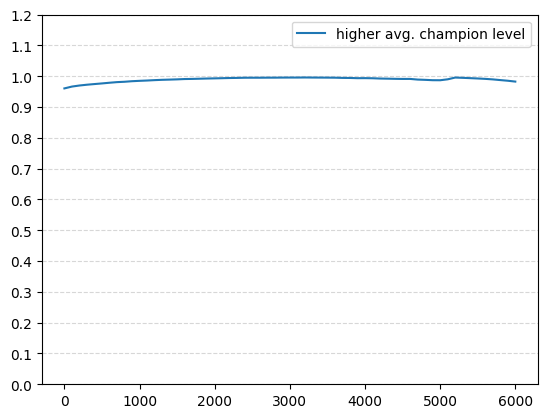

In [8]:
import matplotlib.pyplot as plt
print(get_team_champion_levels(games[1]))
diffs = [i * 100 for i in range(0, 61)]
winrates_higher = []
winrates_lower = []
print(diffs)
for d in diffs:
    wr = higher_champion_level_winrate(games, d)
    winrates_higher.append(wr)
print(winrates_higher)
plt.ylim(0, 1.2)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.yticks([i/10 for i in range(0, 13)])
plt.plot(diffs, winrates_higher, label="higher avg. champion level")
#plt.plot(diffs, winrates_lower, label="lower avg. level")
plt.legend()
plt.show()

In [9]:
print(get_percentage_of_surrendered_games(games))

0.28767550702028083


100%|██████████| 35255/35255 [00:00<00:00, 79072.01it/s]


0.36230445246690735


100%|██████████| 35255/35255 [00:00<00:00, 117692.43it/s]


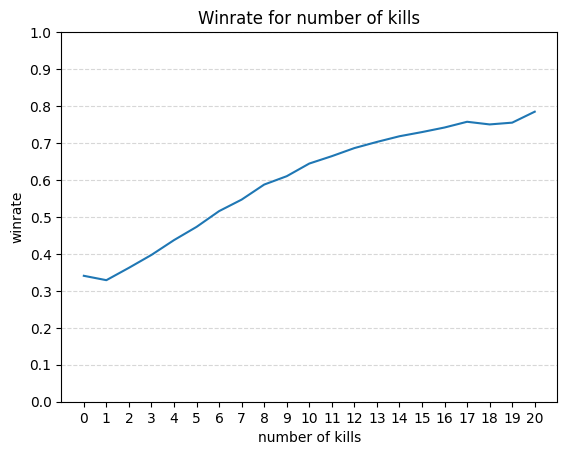

In [10]:
print(get_winratio_for_nr_kills(games, 2))
kills = [i for i in range(0, 21)]
winratio = [get_winratio_for_nr_kills(games, k) for k in kills]
plt.yticks([i/10 for i in range(0, 13)])
plt.xticks(kills)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.title("Winrate for number of kills")
plt.xlabel("number of kills")
plt.ylabel("winrate")
plt.plot(kills, winratio)
plt.show()

100%|██████████| 35255/35255 [00:00<00:00, 67738.63it/s]


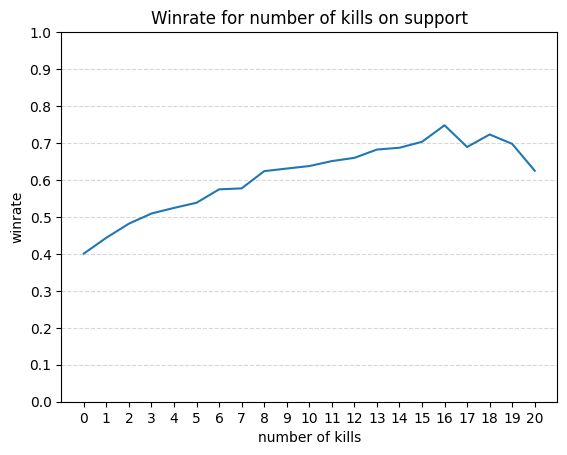

In [11]:
kills = [i for i in range(0, 21)]
winratio = [get_winratio_for_nr_kills_and_role(games, k, "SUPPORT", "BOTTOM") for k in kills]
plt.yticks([i/10 for i in range(0, 13)])
plt.xticks(kills)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.title("Winrate for number of kills on support")
plt.xlabel("number of kills")
plt.ylabel("winrate")
plt.plot(kills, winratio)
plt.show()

 62%|██████▏   | 21987/35255 [00:00<00:00, 84000.22it/s] 

100%|██████████| 35255/35255 [00:00<00:00, 130036.58it/s]


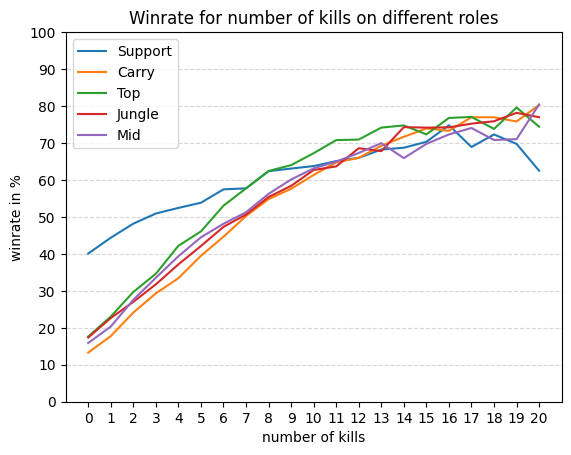

In [12]:
plt.yticks([i*10 for i in range(0, 13)])
plt.xticks(kills)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.title("Winrate for number of kills on different roles")
plt.xlabel("number of kills")
plt.ylabel("winrate in %")

kills = [i for i in range(0, 21)]
winratio = [get_winratio_for_nr_kills_and_role(games, k, "SUPPORT", "BOTTOM") * 100 for k in kills]
plt.plot(kills, winratio, label="Support")

winratio = [get_winratio_for_nr_kills_and_role(games, k, "CARRY", "BOTTOM") * 100 for k in kills]
plt.plot(kills, winratio, label="Carry")

winratio = [get_winratio_for_nr_kills_and_role(games, k, "SOLO", "TOP") * 100 for k in kills]
plt.plot(kills, winratio, label="Top")

winratio = [get_winratio_for_nr_kills_and_role(games, k, "NONE", "JUNGLE") * 100 for k in kills]
plt.plot(kills, winratio, label="Jungle")

winratio = [get_winratio_for_nr_kills_and_role(games, k, "SOLO", "MIDDLE") * 100 for k in kills]
plt.plot(kills, winratio, label="Mid")
plt.legend()
plt.show()

{'Ambessa': (943, 1062), 'Shaco': (1160, 1173), 'Malzahar': (1636, 1444), 'Jhin': (2485, 2522), 'Sona': (497, 498), 'Riven': (777, 886), 'Malphite': (2827, 2675), 'Akshan': (569, 571), 'Mel': (2733, 2954), 'Shen': (808, 773), 'Garen': (1949, 1835), 'Nunu': (517, 531), 'Kassadin': (435, 453), 'Zeri': (699, 676), 'Gangplank': (468, 528), 'Kayn': (1499, 1538), 'Viktor': (875, 890), 'Ezreal': (1460, 1514), 'Velkoz': (1239, 1174), 'DrMundo': (2275, 2071), 'Viego': (2273, 2192), 'MissFortune': (4577, 4144), 'Vayne': (1965, 1876), 'Shyvana': (313, 288), 'Irelia': (981, 1054), 'Morgana': (1928, 1874), 'Sett': (1597, 1374), 'Ekko': (1429, 1471), 'Yone': (1792, 1893), 'Jinx': (2522, 2383), 'Renekton': (755, 709), 'Kaisa': (2405, 2554), 'Thresh': (1608, 1687), 'Yasuo': (2108, 1971), 'Vladimir': (730, 793), 'TahmKench': (877, 866), 'Nasus': (834, 815), 'Gwen': (979, 1091), 'Milio': (1472, 1327), 'Volibear': (1049, 1002), 'Aatrox': (1495, 1482), 'Mordekaiser': (1521, 1460), 'Briar': (1240, 1078), '

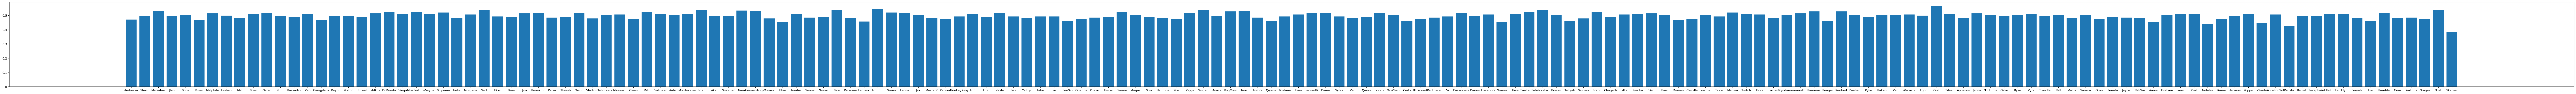

In [35]:
print(get_champion_winrates(games))
wr = get_champion_winrates(games)
wr_calc_champ = []
wr_calc_wr = []
for champ in wr:
    wr_t = wr[champ][0]/(wr[champ][1] + wr[champ][0])
    wr_calc_champ.append(champ)
    wr_calc_wr.append(wr_t)
plt.figure(figsize=(150, 5))
plt.bar(wr_calc_champ, wr_calc_wr)
plt.show()
